In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# loading the datas into dataframe
df= pd.read_csv("advertising.csv")  # here no need to do encoding as the csv file includes only numeric values

# displaying the information about datas
print(df.head()) # upto 5 rows

pd.set_option('display.max_rows',None)
print(df)
pd.reset_option('display.max_rows')

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
5      8.7   48.9       75.0    7.2
6     57.5   32.8       23.5   11.8
7    120.2   19.6       11.6   13.2
8      8.6    2.1        1.0    4.8
9    199.8    2.6       21.2   15.6
10    66.1    5.8       24.2   12.6
11   214.7   24.0        4.0   17.4
12    23.8   35.1       65.9    9.2
13    97.5    7.6        7.2   13.7
14   204.1   32.9       46.0   19.0
15   195.4   47.7       52.9   22.4
16    67.8   36.6      114.0   12.5
17   281.4   39.6       55.8   24.4
18    69.2   20.5       18.3   11.3
19   147.3   23.9       19.1   14.6
20   218.4   27.7       53.4   18.0
21  

In [3]:

# shape of the datasets gives the tuple of dimensions
print("shape of the dataset is=", df.shape)

print("\nNow lets talk about the summary of dataset")
# basic information about the dataset
print(df.info()) # prints the summary of dataframe but doesnot give any modification in or doesnot make any new dataframe

print("\nHey now lets see describe work  okayyy!!")
# for statistics inforamtion about the dataset
print(df.describe()) # focuses on only 1 numeric column 
'''
 to include all columns including text and categoric i.e. no  numeric we do:
 df.describe(include='all')
'''
print("\nNow lets see the relation between various columns")
# to get the correlation matrix i.e. relationship between the numeric columns
print(df.corr())



shape of the dataset is= (200, 4)

Now lets talk about the summary of dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Hey now lets see describe work  okayyy!!
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

Now 

In [ ]:
'''
just a note to remind you that the output might be truncated but it is due to the jupyter notebook so enable the scrollable element to see full ouptut
'''

In [4]:
# checking missing values
'''
we already know from df. info that there is no null value but still lets recheck this
this no missing value so no need to handle it
'''
df.isnull()
num=df.isnull().sum()
print(num)



TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


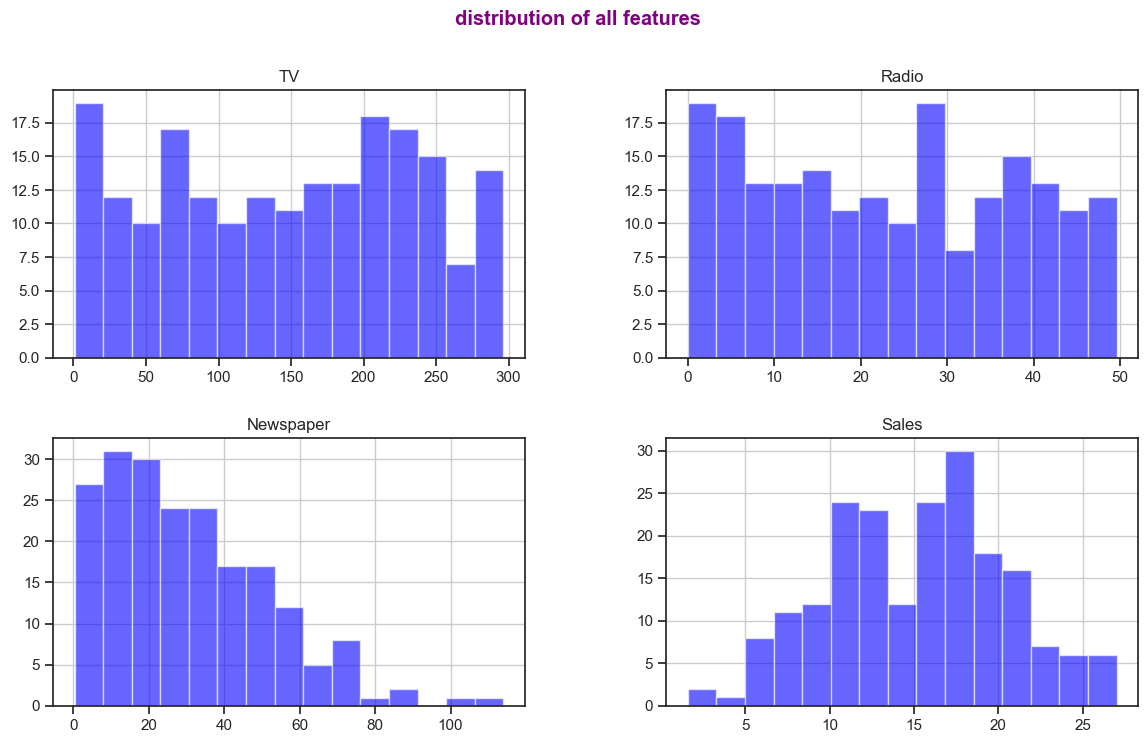

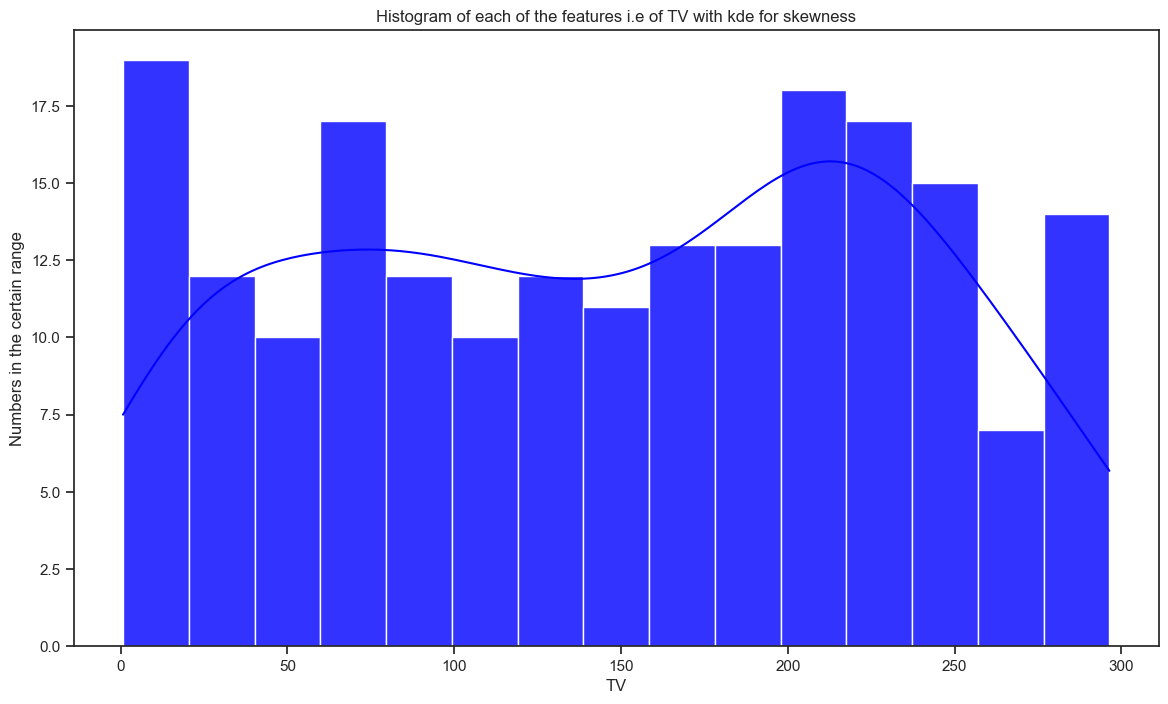

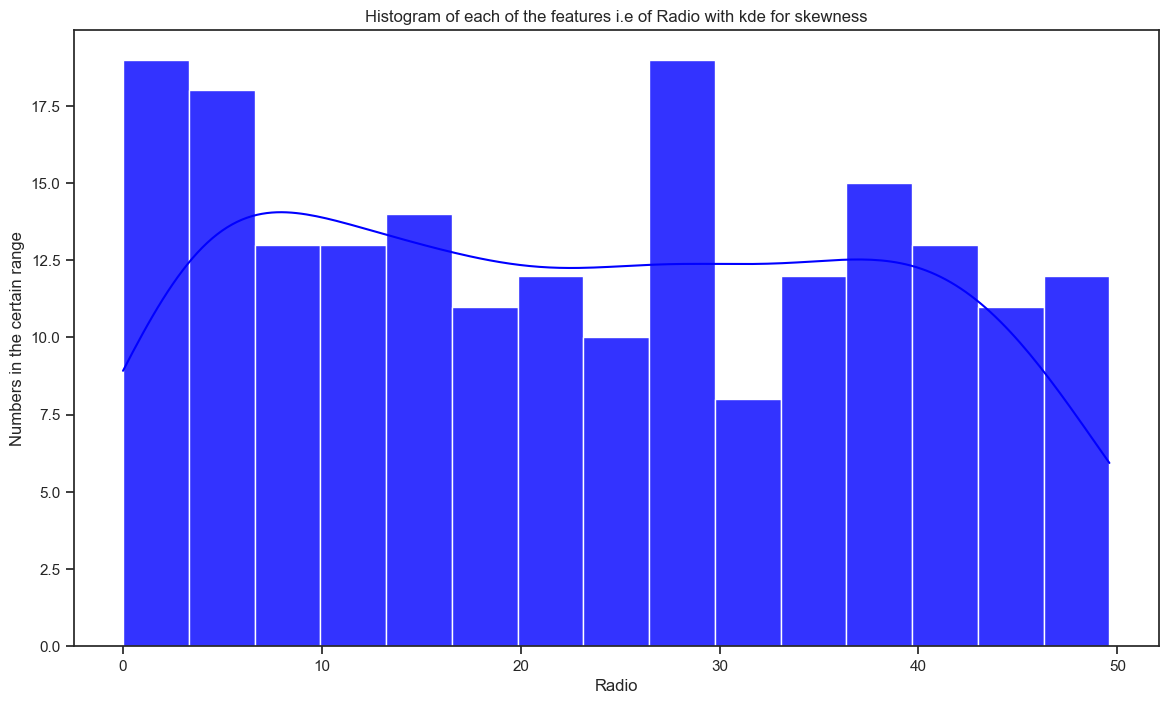

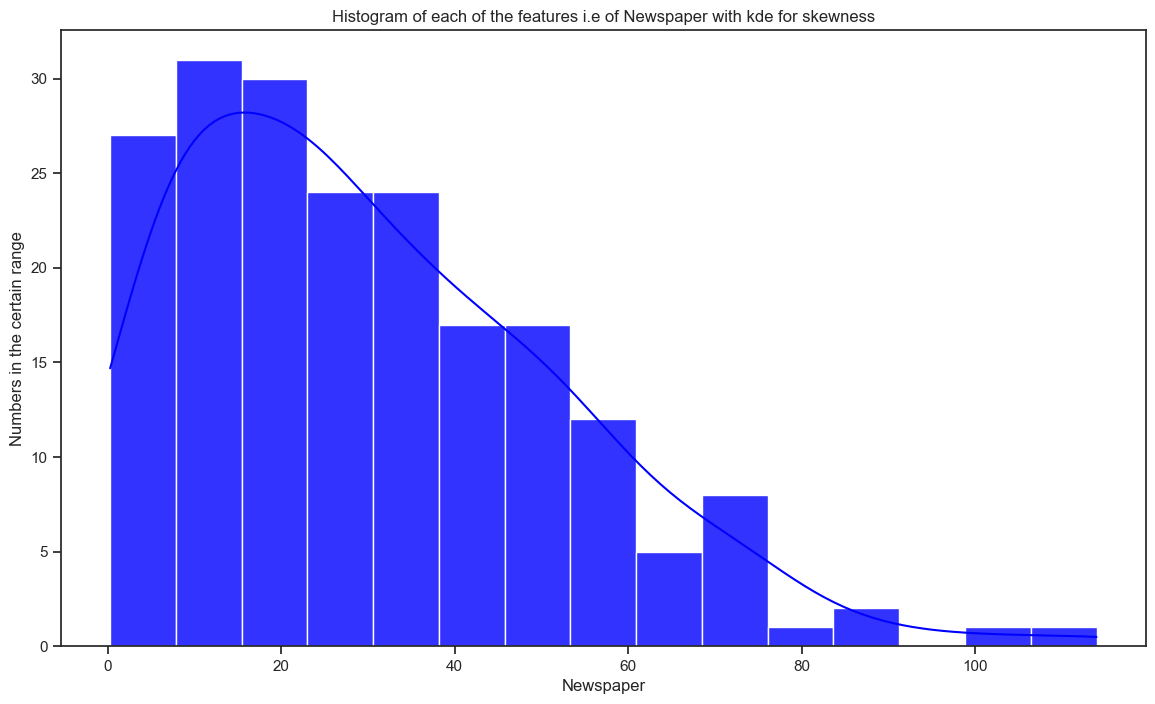

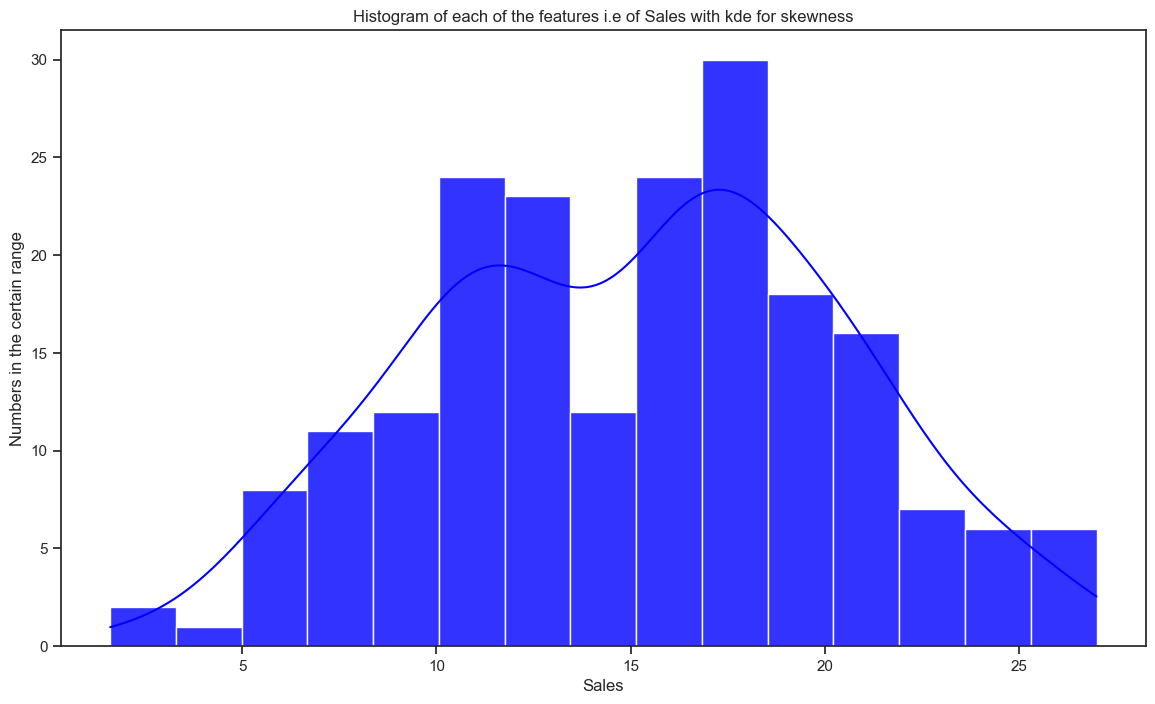

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales       -0.073739
dtype: float64


In [5]:
# visualization of relationship

# preparing the canvas/ background
sns.set(style="dark")  
sns.set(style="ticks")

# various methods for visualization are:
'''
1. Histograms:  this is used to plot the numbers of the numerical datas
that falls into the certain range known as bins. representes by the bars that 
specifies the numbers of datas between the ranges 
it is helpful to find out if datas are skewed or not. and also helps to find outliers
looking for the isolated short bars

for numerical data only.  


'''
# this is used to display the histogram of every features within the 14,8 as it uses the df and pandas
df.hist(figsize=(14,8), bins=15,alpha=0.6, color='blue') # pandas histogram bur calling matplotlib under hood
plt.suptitle('distribution of all features',fontweight='bold',color='purple')
plt.show() 

# can also be done using sns but for this we either have to do one by one or loop though each and display at once
col=['TV','Radio','Newspaper','Sales']

for c in col:
    plt.figure(figsize=(14,8))
    sns.histplot(df[c], bins=15, alpha=0.8, color='blue',kde=True)
    plt.title(f"Histogram of each of the features i.e of {c} with kde for skewness")
    plt.xlabel(c)
    plt.ylabel('Numbers in the certain range')
    plt.show()

          
# skewness of 
print(df.skew())




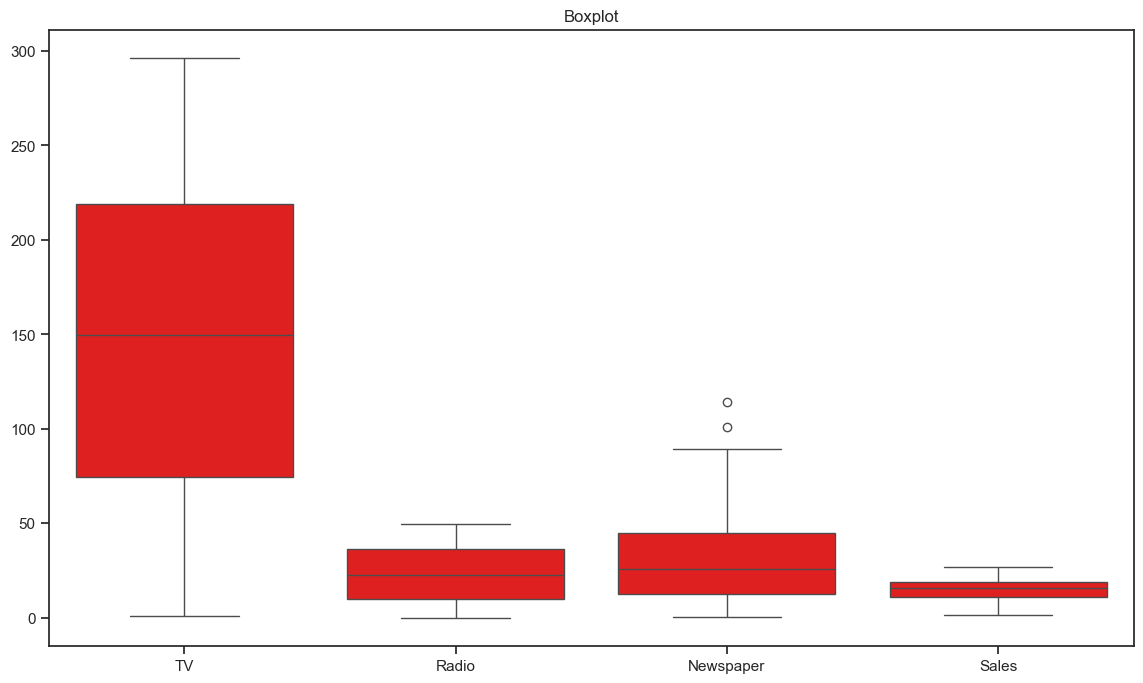

In [ ]:
# as there are cetain outliers seen in histogram  so to see it more clearly boxplot is used

plt.figure(figsize=(14,8))
sns.boxplot(data=df, color='red')
plt.title('Boxplot')
plt.show() 


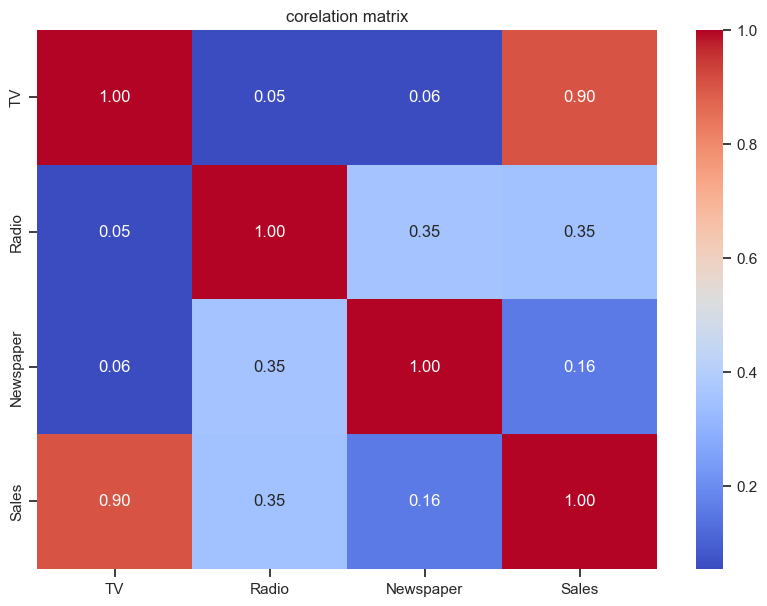

In [ ]:
# correlation visualization using heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),cmap='coolwarm',fmt='.2f',annot=True)
plt.title("corelation matrix")
plt.show()

'''
it is found that there is stong connection between sales and tv and then radio and then newspaper
so make 1 model with tv and radio ponly and other with all 3 to check the models performance.

'''